<a href="https://colab.research.google.com/github/YASH-DIXIT-24/EDA_Sample_Superstore/blob/main/EDA_Sample_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPARKS FOUNDATION



Author -YASH DIXIT

Dataset=https://bit.ly/3i4rbWl

BATCH-GRIPAUGUST21

In [72]:
#libraries used
#pandas ,numpy ,matplotlib,seaborn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [11]:
data=pd.read_csv('SampleSuperstore.csv')

In [12]:
raw_data=data.copy()

THIS WILL SIMPLY PICK OUT 5 RANDOM ROWS FROM THE DATASET

In [13]:
raw_data.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6824,Standard Class,Corporate,United States,Montgomery,Alabama,36116,South,Furniture,Tables,358.580,2,0.0,39.4438
2303,Second Class,Home Office,United States,Roswell,Georgia,30076,South,Furniture,Chairs,723.920,4,0.0,188.2192
4135,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Office Supplies,Binders,112.120,5,0.2,42.0450
9080,Second Class,Corporate,United States,Santa Ana,California,92704,West,Technology,Phones,143.952,6,0.2,17.9940
1641,Standard Class,Consumer,United States,Washington,District of Columbia,20016,East,Furniture,Furnishings,41.370,3,0.0,17.3754


### NOW WE WILL LOOK THE NUMBER OF MISSING VALUES PRESENT IN THE DATASET IN EACH OF THE FEATURES

In [14]:
raw_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Now if we wish to find the total no of null values 

In [15]:
print("Total_null = ",raw_data.isnull().sum().sum())

Total_null =  0


In [16]:
print(raw_data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [18]:
raw_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
raw_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [22]:
raw_data.shape

(9994, 13)

Now lets check for the duplicate rows

In [24]:
raw_data.duplicated().sum()

17

Now we know that duplicates can cause our model to predict wrong output therefore we will drop the duplicate rows 

In [32]:
raw_data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200



Now we will obtain various statistical inferences from the datset including the covariance , corelation.

In [35]:
print("Correaltion:",raw_data.corr(),"Covariance",raw_data.cov(),sep="\n")

Correaltion:
             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000
Covariance
              Postal Code          Sales    Quantity    Discount         Profit
Postal Code  1.028080e+09 -476682.766590  910.415885  386.870404 -225045.849445
Sales       -4.766828e+05  388434.455308  278.459923   -3.627228   69944.096586
Quantity     9.104159e+02     278.459923    4.951113    0.003961      34.534769
Discount     3.868704e+02      -3.627228    0.003961    0.042622     -10.615173
Profit      -2.250458e+05   69944.096586   34.534769  -10.615173   54877.798055


In [37]:
print(raw_data.value_counts())

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit  
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     2
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     2
                                            San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     2
                Corporate    United States  Seattle        Washington  98105        West     Office Supplies  Paper         19.440   3         0.0        9.3312     2
                Home Office  United States  Columbus       Ohio        43229        East     Furniture        Chairs        281.372  2         0.3       -12.0588    2
   

It is very clearly visible that the postal code of superstore is in no way contribute to the model so we can drop this feature from our raw_data

In [38]:
raw_data=raw_data.drop(columns=['Postal Code'],axis=1)

DATA VISULIZATION USING MATPLOTLIB AND **SEABORN**

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

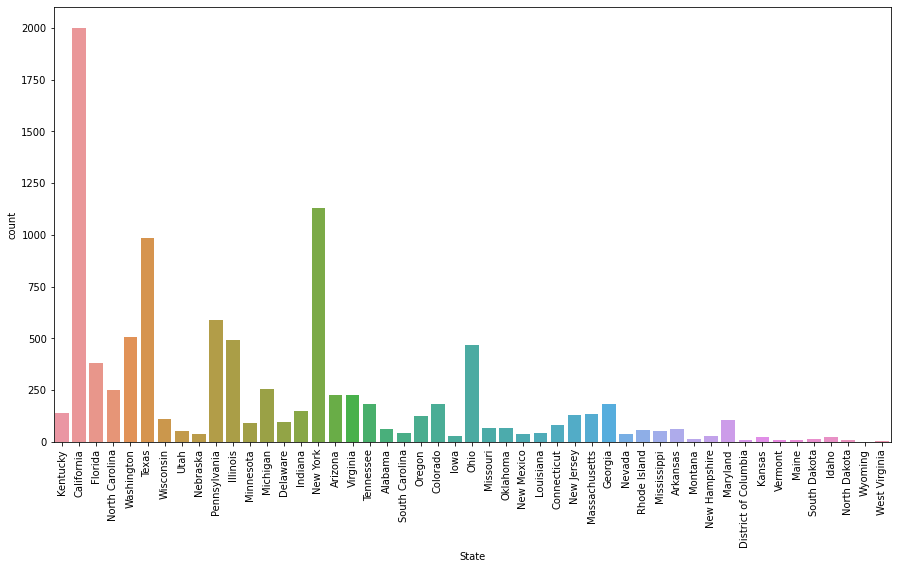

In [42]:
print(raw_data['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=raw_data['State'])
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


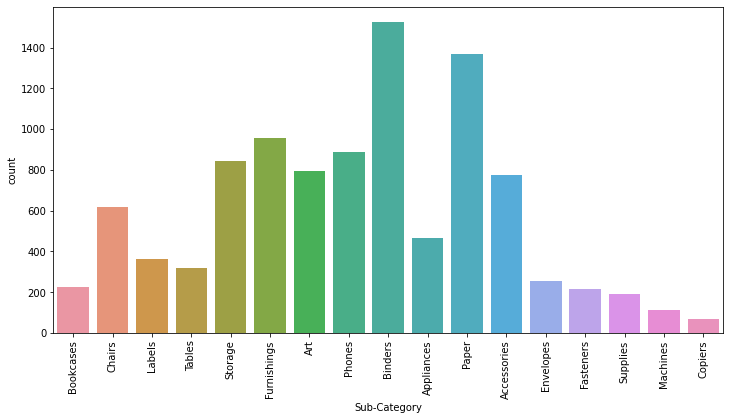

In [43]:
print(raw_data['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=raw_data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

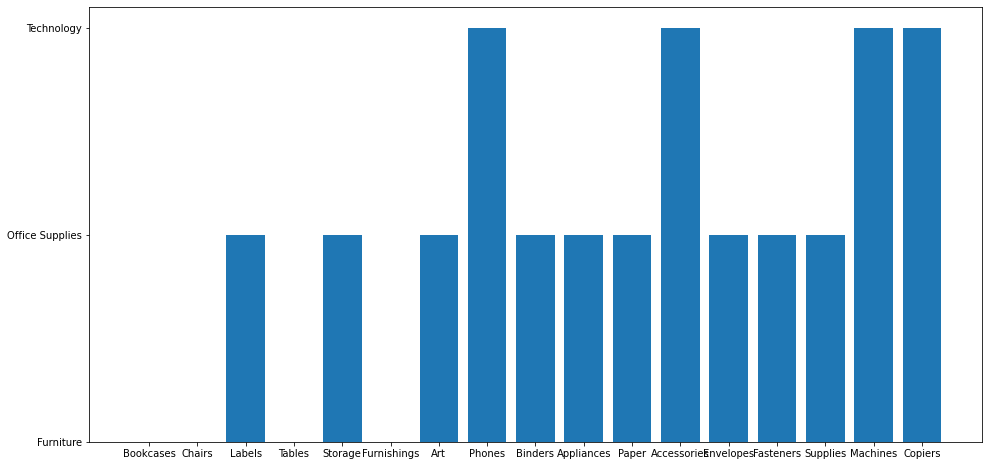

In [44]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=raw_data)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

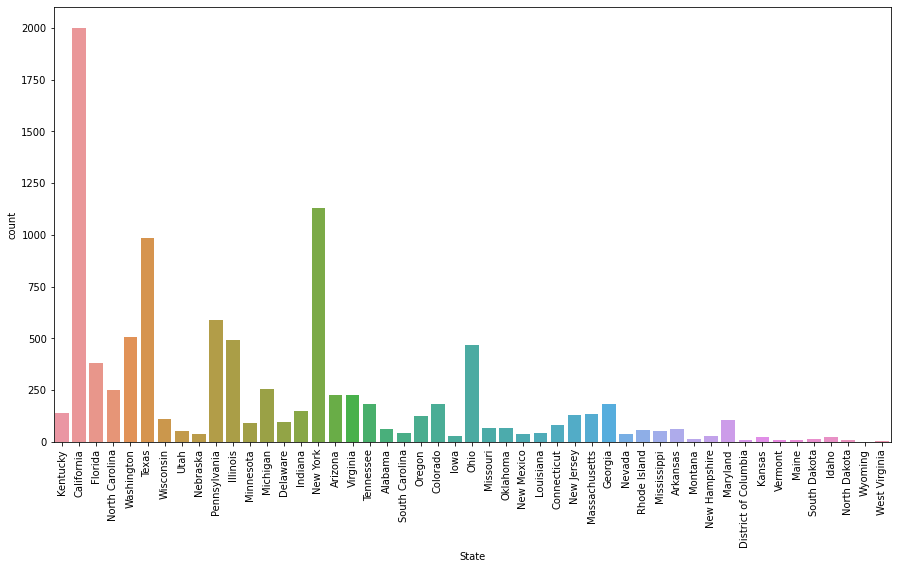

In [45]:
print(raw_data['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=raw_data['State'])
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


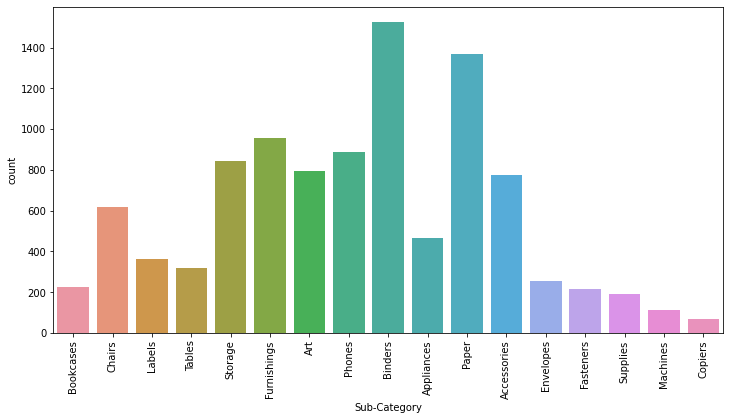

In [46]:
print(raw_data['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=raw_data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()


A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

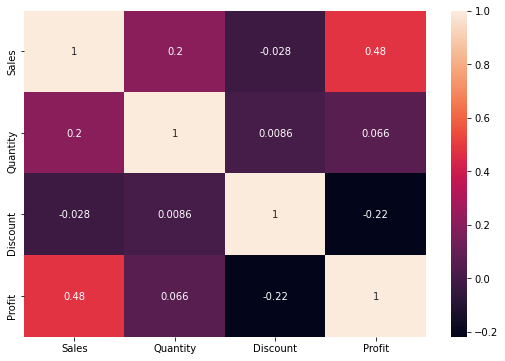

In [47]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(raw_data.corr(), annot= True)
plt.show()

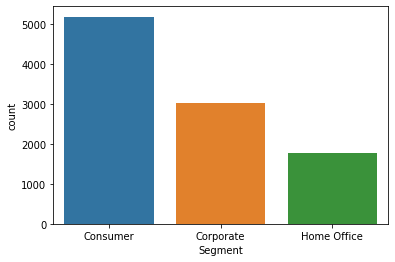

In [48]:
sns.countplot(x=raw_data['Segment'])

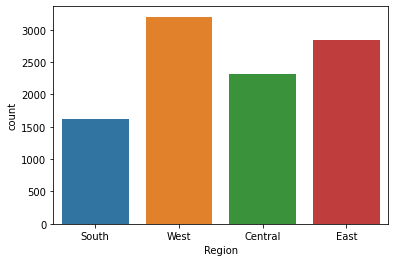

In [49]:
sns.countplot(x=raw_data['Region'])

A line plot is a graph that shows frequency of data along a number line. It is best to use a line plot when comparing fewer than 25 numbers. It is a quick, simple way to organize data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


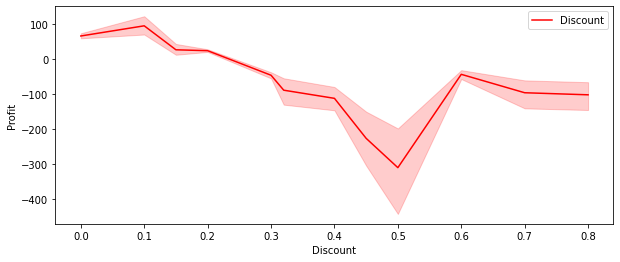

In [50]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = raw_data, color = 'r', label= 'Discount')
plt.legend()

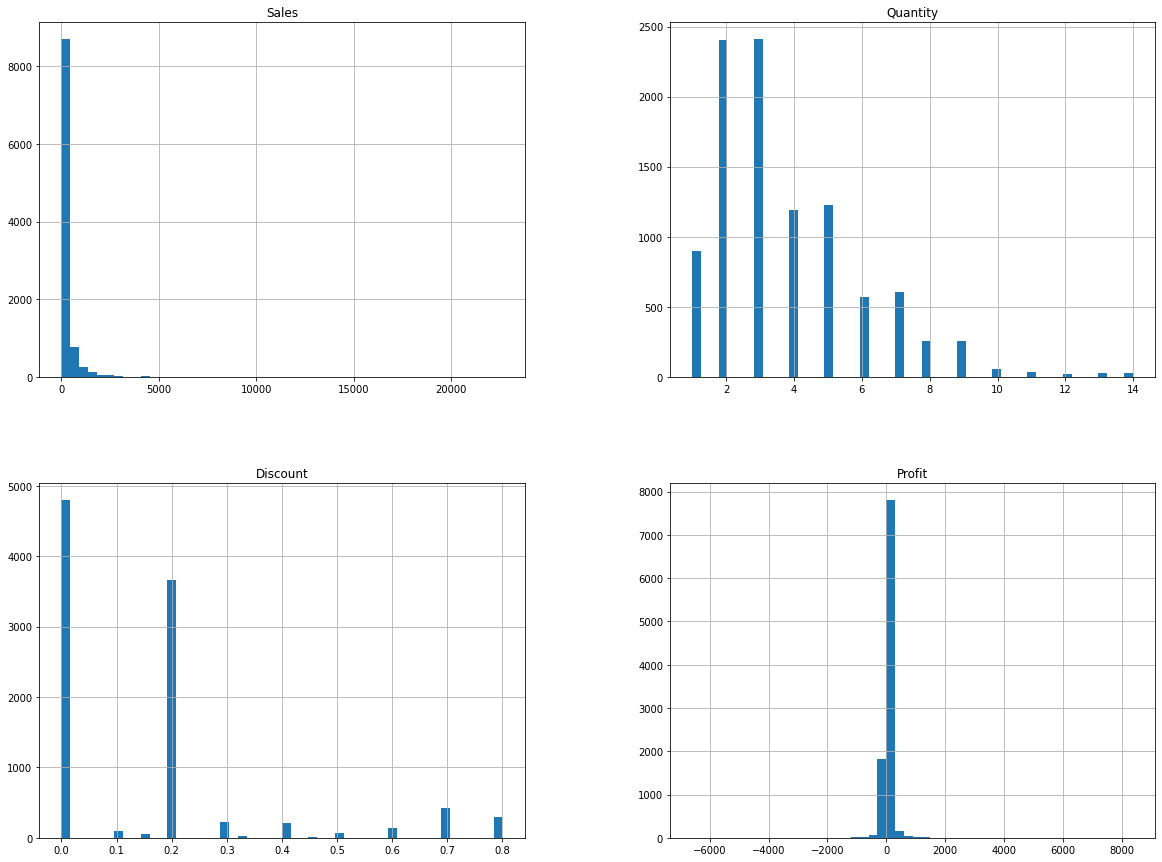

In [51]:
raw_data.hist(bins=50 ,figsize=(20,15))
plt.show()

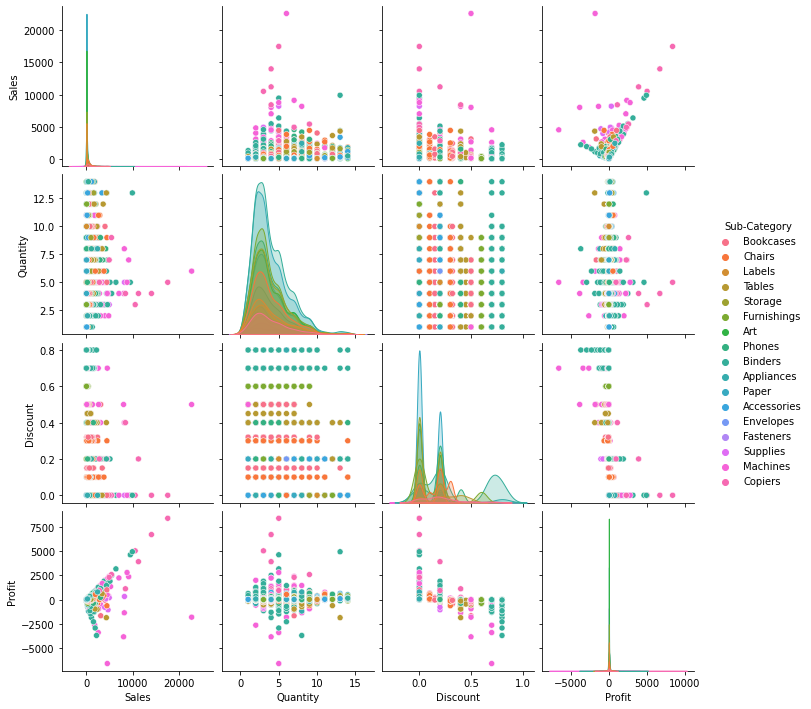

In [52]:
figsize=(15,10)
sns.pairplot(raw_data,hue='Sub-Category')

In [53]:
grouped=pd.DataFrame(raw_data.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


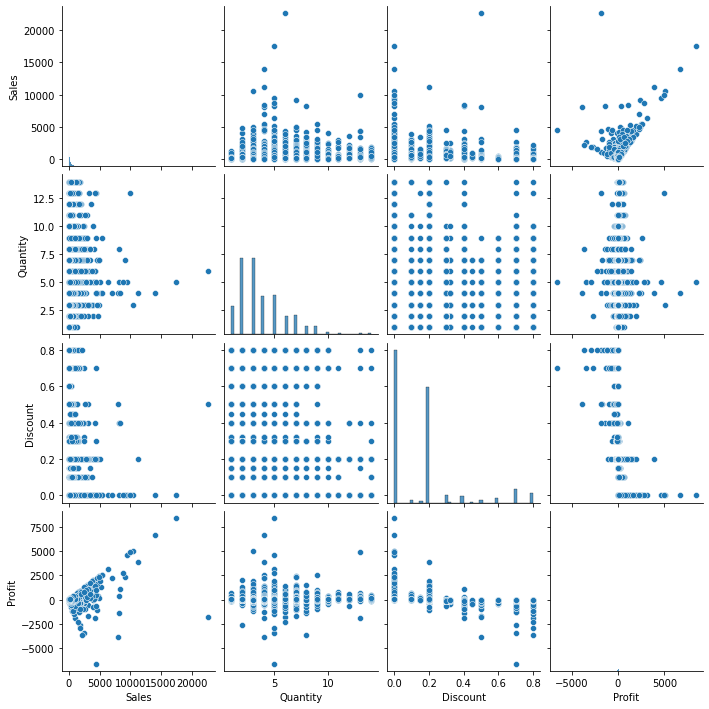

In [54]:
sns.pairplot(raw_data)


A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


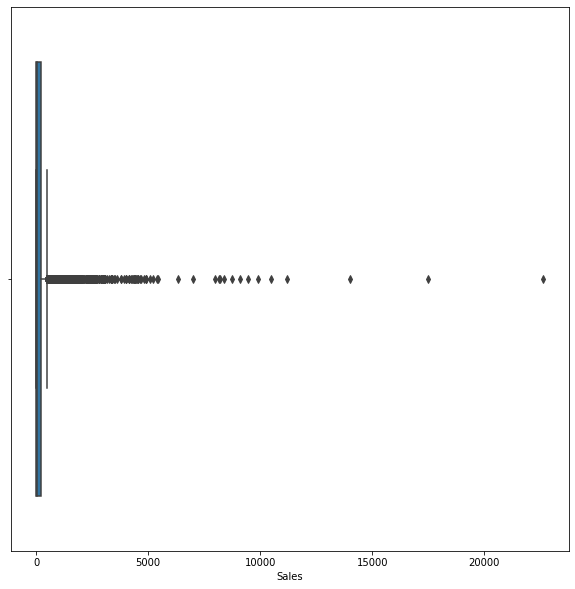

In [55]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(raw_data['Sales'])

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


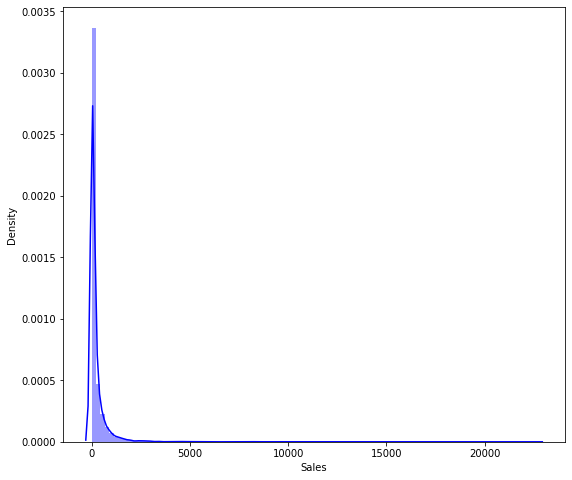

In [64]:
print(raw_data['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(raw_data['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


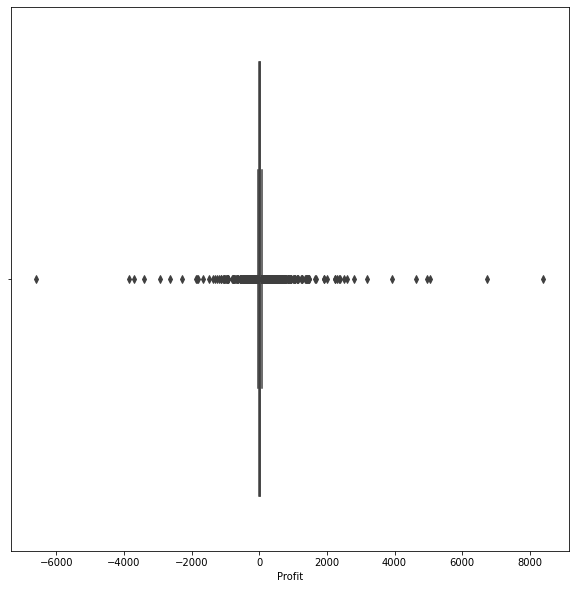

In [56]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(raw_data['Profit'])

### CALCULATING THE INTERQUARTILE RANGE FOR THE DATASET

In [57]:
Quartile_1 = raw_data.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Quartile_3 = raw_data.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [58]:
Inter_quartile_range=Quartile_3-Quartile_1 

In [59]:
Inter_quartile_range

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64

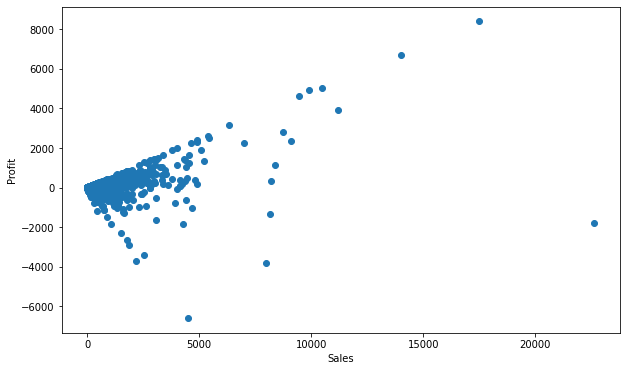

In [61]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(raw_data["Sales"] ,raw_data["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

### CALCULATING THE OUTLIER RANGE FOR THE DATASET FOR EACH OF THE FOLLOWING FEATURES OF THE DATASET

In [65]:
x=Quartile_1-1.5*Inter_quartile_range
y=Quartile_3+1.5*Inter_quartile_range

In [70]:
print("The outliers will be less than\n",x,"\nand will be greater than\n",y,"for each of the following features")

The outliers will be less than
 Sales      -271.710000
Quantity     -2.500000
Discount     -0.300000
Profit      -39.724125
dtype: float64 
and will be greater than
 Sales       498.930000
Quantity      9.500000
Discount      0.500000
Profit       70.816875
dtype: float64 for each of the following features


In [76]:
grouped=pd.DataFrame(raw_data.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [77]:
raw_data.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


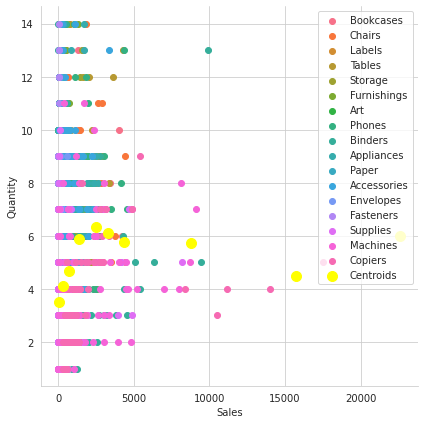

In [80]:
x = data.iloc[:, [9, 10, 11, 12]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

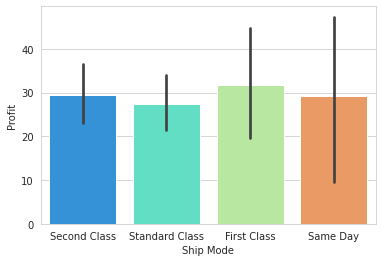

In [83]:
#profit vs ship mode
sns.barplot(x=raw_data['Ship Mode'],y=raw_data['Profit'],palette='rainbow')

RESULT=STANDARD CLASS HAS THE MOST ORDERS


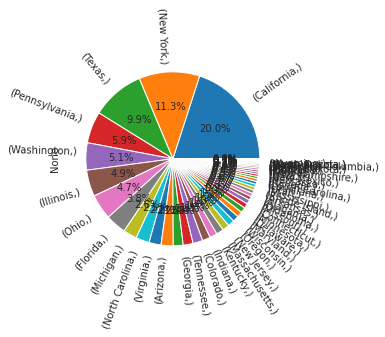

In [86]:
state= raw_data[['State']].value_counts()

state.plot.pie(autopct='%1.1f%%',rotatelabels=True)


The States that generated the most orders were California , New York , texas , Pennsylvania , Washington

In [89]:

raw_data.groupby('State').sum().sort_values('Profit').tail()

,Sales,Quantity,Discount,Profit
State,,,,
Virginia,70636.7200,893,0.0,18597.9504
Michigan,76269.6140,946,1.8,24463.1876
Washington,138641.2700,1883,32.4,33402.6517
New York,310876.2710,4224,62.4,74038.5486
California,457687.6315,7667,145.6,76381.3871


Result=The top 5 States generating most profits are California , New York , Washington , Michigan , Virginia

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114 entries, 2 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     4114 non-null   object 
 1   Segment       4114 non-null   object 
 2   Country       4114 non-null   object 
 3   City          4114 non-null   object 
 4   State         4114 non-null   object 
 5   Region        4114 non-null   object 
 6   Category      4114 non-null   object 
 7   Sub-Category  4114 non-null   object 
 8   Sales         4114 non-null   float64
 9   Quantity      4114 non-null   int64  
 10  Discount      4114 non-null   float64
 11  Profit        4114 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 417.8+ KB


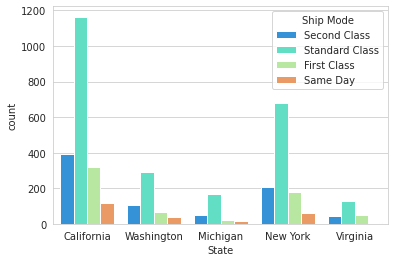

In [90]:
newdf = raw_data[raw_data['State'].isin(['California','New York','Washington','Michigan','Virginia'])]
newdf.info()
sns.countplot(x='State', hue='Ship Mode',data=newdf,palette='rainbow')

the preferred shipping Mode of the top 5 states generating most profit was Standard Class
